In [79]:
import matplotlib.pyplot as plt
import numpy as np

import librosa
from librosa import display

from scipy.io import wavfile

[ 0.0000000e+00  0.0000000e+00 -2.3250562e-12 ...  1.9815681e-05
 -1.6023404e-06  0.0000000e+00] 
 22050


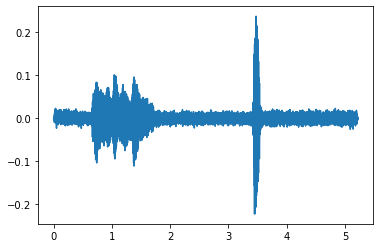

In [81]:
data, samplerate = librosa.load("tmp_audio/inputaudio.wav")
# samplerate, data = wavfile.read("inputaudio.wav")

print(data,'\n', samplerate)

time = len(data) / samplerate
plt.plot(np.linspace(0,time,len(data)), data)
plt.show()

# mel filter
定義我家的 mel filter 長怎樣

In [43]:
filter_band = librosa.filters.mel(n_fft=2048,sr=samplerate,n_mels=6)
filter_band.shape

(6, 1025)

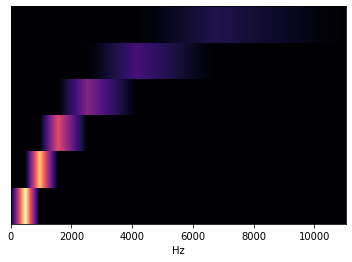

In [44]:
plt.figure()
librosa.display.specshow(filter_band,sr=samplerate,x_axis="linear")
plt.show()

In [35]:
mel_spectrogram = librosa.feature.melspectrogram(data,sr=samplerate,n_fft=2048, hop_length=1024,n_mels=3)

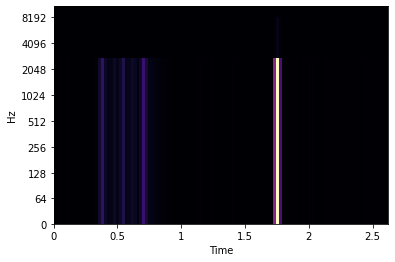

In [42]:
plt.figure()
librosa.display.specshow(mel_spectrogram,sr=samplerate,x_axis="time",y_axis="log")
plt.show()

# STFT

In [82]:
print(data.shape)
S = librosa.stft(data,n_fft=2048,hop_length=512)
print(S.shape)

y_hat = librosa.istft(S)
print(y_hat)
print(data)

(115212,)
(1025, 226)
[-3.8324587e-11 -4.3471504e-11 -4.1992586e-11 ...  2.2449676e-05
  8.9910820e-05  8.7113694e-05]
[ 0.0000000e+00  0.0000000e+00 -2.3250562e-12 ...  1.9815681e-05
 -1.6023404e-06  0.0000000e+00]


In [84]:
import winsound
import wavio
Idata = np.array(np.array(y_hat*10000),np.int32)
wavio.write("mytune.wav",Idata,samplerate)

filename = "mytune.wav"
winsound.PlaySound(filename, winsound.SND_FILENAME)

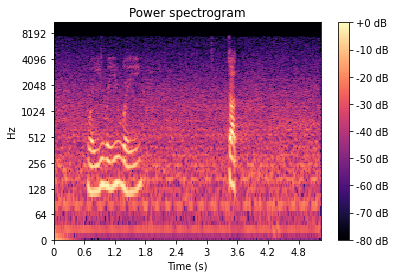

In [78]:
fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.amplitude_to_db(S,ref=np.max),
                               y_axis='log', 
                               x_axis='s', ax=ax)
ax.set_title('Power spectrogram')
fig.colorbar(img, ax=ax, format="%+2.0f dB")